## Import Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing data

In [2]:
data=pd.read_csv("C:\\Users\\hp\\Downloads\\PS_20174392719_1491204439457_log.csv\\PS_20174392719_1491204439457_log.csv")
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\hp\\Downloads\\PS_20174392719_1491204439457_log.csv\\PS_20174392719_1491204439457_log.csv'

## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Data Cleaning

## Empty cells

In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Check Duplicates

In [5]:
print('Number of duplicated rows: ' , len(data[data.duplicated()]))

Number of duplicated rows:  0


## Plotting Boxplot

In [ ]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## Encoding Categorial Data

In [13]:
categ_col = data.select_dtypes(include=['object']).columns

# Initialize encoders
label_encoder = LabelEncoder()

# Encode each categorical column using Label Encoding for simplicity
encoded_data = data.copy()
for i in categ_col:
    encoded_data[i] = label_encoder.fit_transform(data[i])

# Display the first 5 rows of the encoded dataset
print(encoded_data)

         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     3     9839.64    757869      170136.00       160296.36   
1           1     3     1864.28   2188998       21249.00        19384.72   
2           1     4      181.00   1002156         181.00            0.00   
3           1     1      181.00   5828262         181.00            0.00   
4           1     3    11668.14   3445981       41554.00        29885.86   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13   5651847      339682.13            0.00   
6362616   743     4  6311409.28   1737278     6311409.28            0.00   
6362617   743     1  6311409.28    533958     6311409.28            0.00   
6362618   743     4   850002.52   2252932      850002.52            0.00   
6362619   743     1   850002.52    919229      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0         

## Extract Dependent and Independent Variables

In [14]:
X = encoded_data.iloc[:,1:10]   #Independent variable
y = encoded_data['isFlaggedFraud']     #dependent variable

## ## Statistical Analysis
### (Correlation,Describe) 

In [15]:
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

                 step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
step            1.000  0.007   0.022    -0.000         -0.010          -0.010   
type            0.007  1.000   0.088     0.000         -0.340          -0.353   
amount          0.022  0.088   1.000     0.000         -0.003          -0.008   
nameOrig       -0.000  0.000   0.000     1.000         -0.001          -0.001   
oldbalanceOrg  -0.010 -0.340  -0.003    -0.001          1.000           0.999   
newbalanceOrig -0.010 -0.353  -0.008    -0.001          0.999           1.000   
nameDest        0.004  0.584  -0.169    -0.000         -0.163          -0.166   
oldbalanceDest  0.028 -0.105   0.294     0.000          0.066           0.068   
newbalanceDest  0.026 -0.059   0.459     0.000          0.042           0.042   
isFraud         0.032  0.021   0.077    -0.000          0.010          -0.008   
isFlaggedFraud  0.003  0.003   0.012     0.001          0.004           0.004   

                nameDest  o

<Axes: >

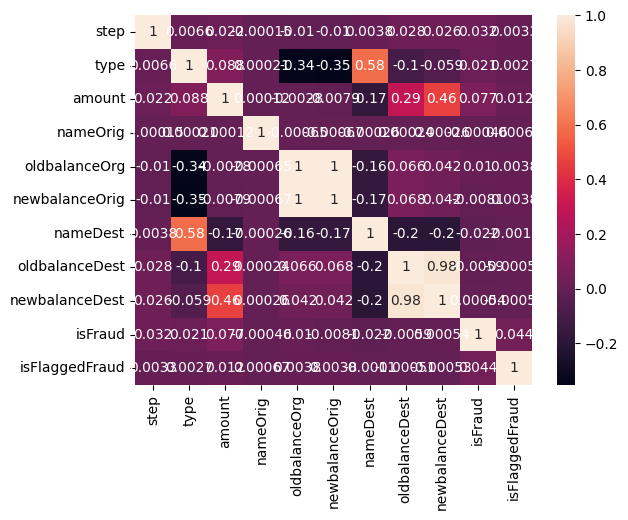

In [16]:
correlation=encoded_data.corr(numeric_only=True)
print(np.around(correlation,decimals=3))
sns.heatmap(correlation,annot=True)

## Split Train and Test Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Fitting the Logistic Regression model to the training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Comparing the actual output values for X_test with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(data)

         Actual  Predicted
3737323       0          0
264914        0          0
85647         0          0
5899326       0          0
2544263       0          0
...         ...        ...
2210524       0          0
956542        0          0
5474798       0          0
878120        0          0
1592828       0          0

[1272524 rows x 2 columns]


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score is ", accuracy * 100, "%")

# Optionally, include detailed performance metrics:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy score is  99.99968566408177 %

Confusion Matrix:
[[1272520       1]
 [      3       0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

